<a href="https://colab.research.google.com/github/Anjali2277/cskIpl_Auction/blob/main/CSK_Ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx matplotlib


In [ ]:
class Player:
    def __init__(self, name, base_price, batting_avg, bowling_avg):
        self.name = name
        self.base_price = base_price
        self.batting_avg = batting_avg
        self.bowling_avg = bowling_avg

    def __repr__(self):
        return f"{self.name} (Base Price: {self.base_price}, Batting Avg: {self.batting_avg}, Bowling Avg: {self.bowling_avg})"



# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
import zipfile
import os

# Step 1: Upload the ZIP File
uploaded = files.upload()

# Get the uploaded file name
zip_file_name = 'iplPlayer.zip'

# Step 2: Extract the ZIP File
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')

# Check the extracted files
extracted_files = os.listdir('extracted_data')
extracted_files


Saving iplPlayer.zip to iplPlayer.zip


['cricket_data.csv']

In [ ]:
from google.colab import files
import zipfile
import os

# Step 1: Upload the ZIP File
uploaded = files.upload()

# Get the uploaded file name
zip_file_name = 'iplAuction.zip'

# Step 2: Extract the ZIP File
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')

# Check the extracted files
extracted_files = os.listdir('extracted_data')
extracted_files


Saving iplAuction.zip to iplAuction.zip


['cricket_data.csv', 'auction.csv']

In [ ]:
import pandas as pd

# Load the auction data
auction_file = 'extracted_data/auction.csv'
df = pd.read_csv(auction_file)

# Inspect the data to understand its structure
df.head()



,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
0,Daryl Mitchell,Overseas,All-Rounder,Chennai Super Kings,140000000
1,Sameer Rizvi,Indian,Batter,Chennai Super Kings,84000000
2,Shardul Thakur,Indian,All-Rounder,Chennai Super Kings,40000000
3,Mustafizur Rahman,Overseas,Bowler,Chennai Super Kings,20000000
4,Rachin Ravindra,Overseas,All-Rounder,Chennai Super Kings,18000000


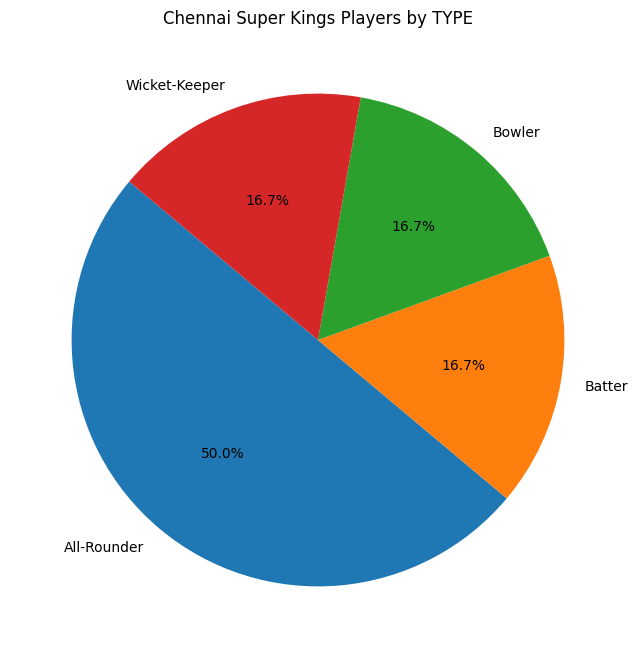

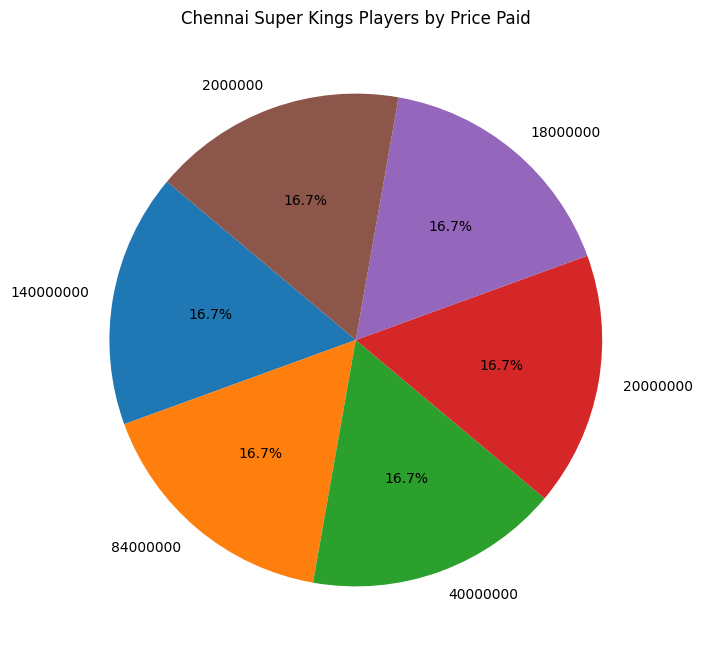

In [ ]:
import matplotlib.pyplot as plt

# Pie chart for 'Type'
type_counts = csk_players['TYPE'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Chennai Super Kings Players by TYPE')
plt.show()

# Pie chart for 'Price Paid'
price_paid_counts = csk_players['PRICE PAID'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(price_paid_counts, labels=price_paid_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Chennai Super Kings Players by Price Paid')
plt.show()


In [ ]:
class Team:
    def __init__(self, name, budget, needs):
        self.name = name
        self.budget = budget
        self.needs = needs
        self.squad = []

    def can_afford(self, player):
        return self.budget >= player.base_price

    def buy_player(self, player):
        if self.can_afford(player):
            self.squad.append(player)
            self.budget -= player.base_price
            return True
        return False

    def __repr__(self):
        return f"Team {self.name} (Budget: {self.budget}, Needs: {self.needs})\nSquad: {self.squad}"

In [ ]:
def simulate_auction(players, team):
    transactions = []
    for player in players:
        if team.buy_player(player):
            transactions.append((player.name, player.base_price))
        else:
            transactions.append((player.name, 'Not Bought'))
    return transactions

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_auction_graph(players, transactions):
    G = nx.DiGraph()

    for player in players:
        G.add_node(player.name, base_price=player.base_price)

    for player_name, status in transactions:
        if status != 'Not Bought':
            G.add_edge('Auction', player_name, weight=status)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title('Auction Simulation Graph')
    plt.show()

Transactions:
 [('Player1', 10), ('Player2', 15), ('Player3', 8), ('Player4', 12), ('Player5', 'Not Bought'), ('Player6', 5)]


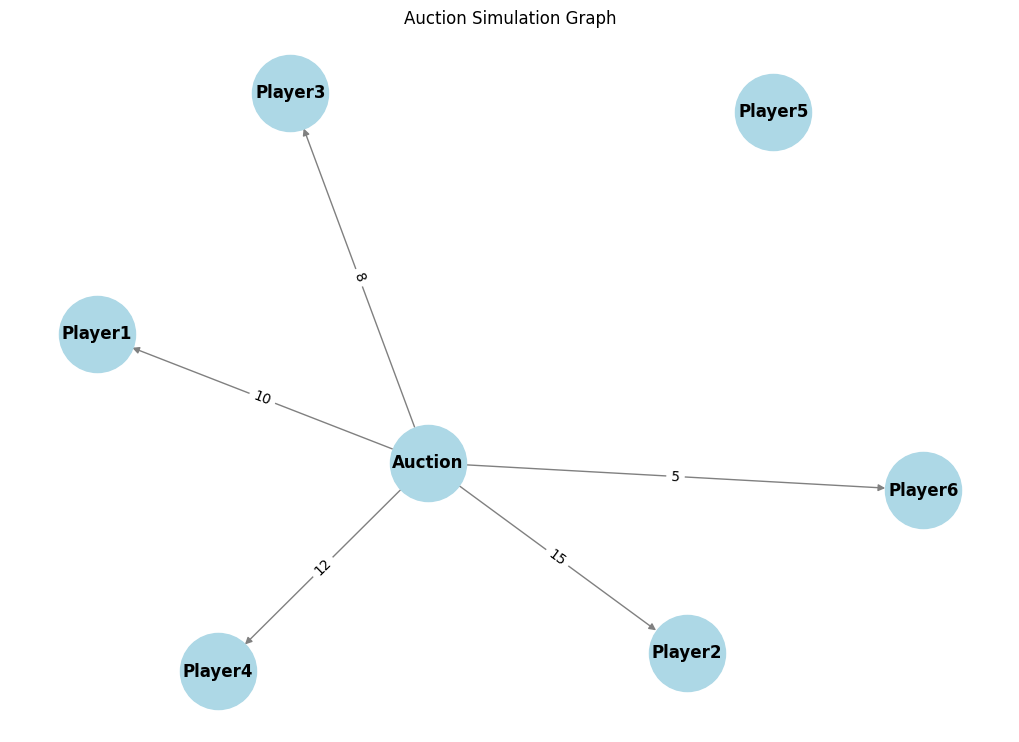

In [ ]:
players = [
    Player("Player1", 10, 50.0, 20.0),
    Player("Player2", 15, 55.0, 18.0),
    Player("Player3", 8, 40.0, 25.0),
    Player("Player4", 12, 60.0, 22.0),
    Player("Player5", 20, 45.0, 30.0),
    Player("Player6", 5, 35.0, 15.0)
]

# Define sample team
team = Team("CSK", 50, {"batsmen": 2, "bowlers": 2})

# Simulate the auction
transactions = simulate_auction(players, team)
print("Transactions:\n", transactions)

# Plot the auction graph
plot_auction_graph(players, transactions)

Transactions:
 [('Ruturaj Gaikwad', 10), ('Shivam Dube', 15), ('Daryl Mitchell', 12), ('Ravindra Jadeja', 'Not Bought'), ('Ajinkya Rahane', 10), ('Rachin Ravindra', 'Not Bought'), ('MS Dhoni', 'Not Bought'), ('Moeen Ali', 'Not Bought'), ('Sameer Rizvi', 'Not Bought'), ('Shardul Thakur', 'Not Bought'), ('Mitchell Santner', 3), ('Richard Gleeson', 'Not Bought')]


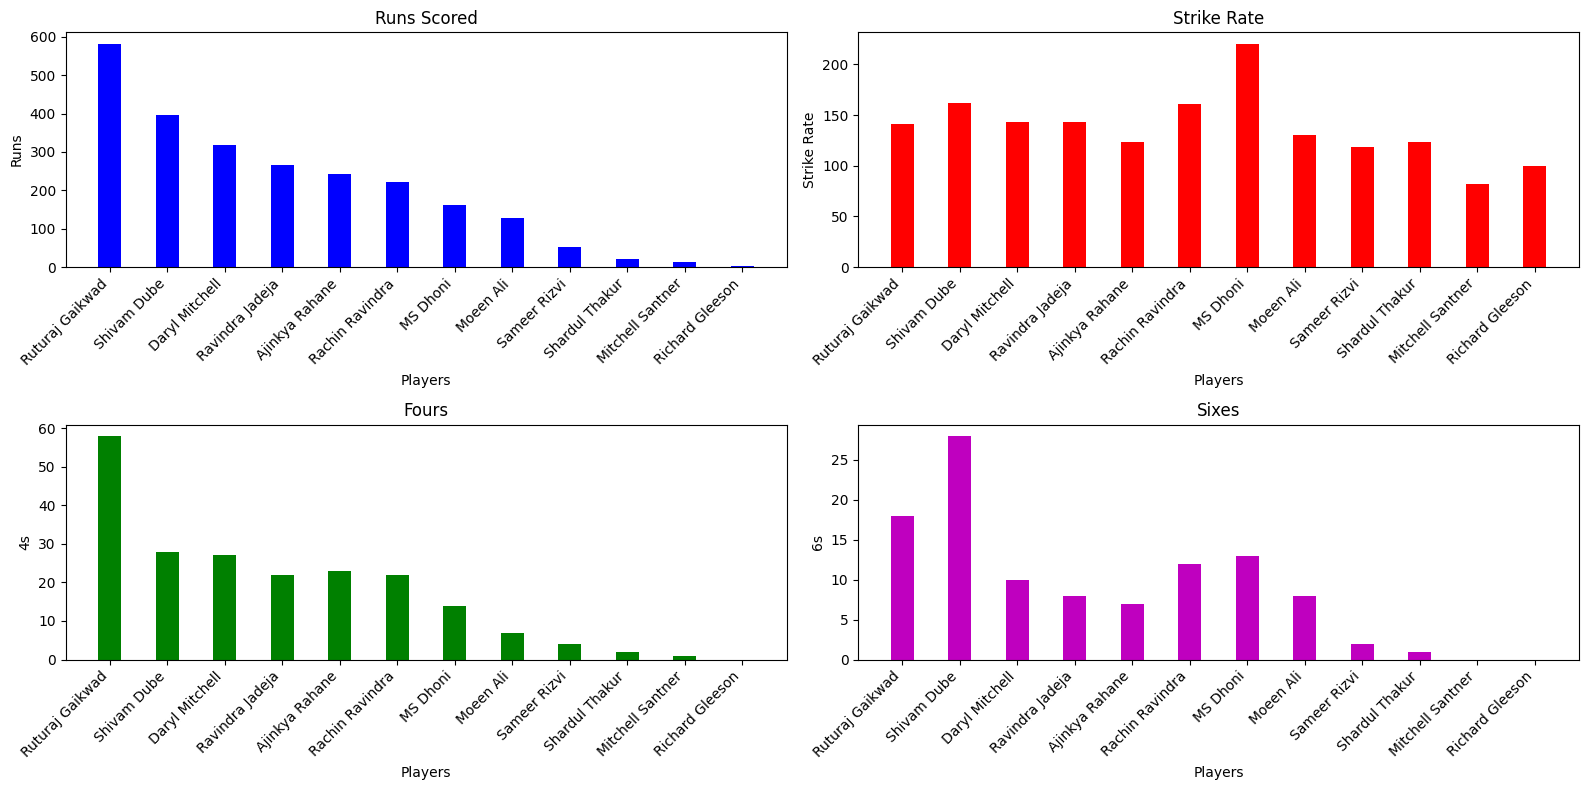

Best Combination within Budget 50:
 [Richard Gleeson (Matches: 2, Innings: 1, Runs: 2, SR: 100.0, 4s: 0, 6s: 0, Base Price: 2), Mitchell Santner (Matches: 3, Innings: 3, Runs: 14, SR: 82.35, 4s: 1, 6s: 0, Base Price: 3), Sameer Rizvi (Matches: 8, Innings: 5, Runs: 51, SR: 118.6, 4s: 4, 6s: 2, Base Price: 5), Shardul Thakur (Matches: 9, Innings: 3, Runs: 21, SR: 123.53, 4s: 2, 6s: 1, Base Price: 7), Rachin Ravindra (Matches: 10, Innings: 10, Runs: 222, SR: 160.87, 4s: 22, 6s: 12, Base Price: 8), Ruturaj Gaikwad (Matches: 14, Innings: 14, Runs: 583, SR: 141.16, 4s: 58, 6s: 18, Base Price: 10), Ajinkya Rahane (Matches: 13, Innings: 12, Runs: 242, SR: 123.47, 4s: 23, 6s: 7, Base Price: 10)]
Total Cost: 45.00


In [ ]:
# Install necessary libraries
!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Define the Player class
class Player:
    def __init__(self, name, matches, innings, runs, strike_rate, fours, sixes, base_price):
        self.name = name
        self.matches = matches
        self.innings = innings
        self.runs = runs
        self.strike_rate = strike_rate
        self.fours = fours
        self.sixes = sixes
        self.base_price = base_price

    def __repr__(self):
        return (f"{self.name} (Matches: {self.matches}, Innings: {self.innings}, Runs: {self.runs}, "
                f"SR: {self.strike_rate}, 4s: {self.fours}, 6s: {self.sixes}, Base Price: {self.base_price})")

# Define the Team class
class Team:
    def __init__(self, name, budget):
        self.name = name
        self.budget = budget
        self.squad = []

    def can_afford(self, player):
        return self.budget >= player.base_price

    def buy_player(self, player):
        if self.can_afford(player):
            self.squad.append(player)
            self.budget -= player.base_price
            return True
        return False

    def __repr__(self):
        return f"Team {self.name} (Budget: {self.budget})\nSquad: {self.squad}"

# Function to plot the performance graph
def plot_performance_graph(players):
    names = [player.name for player in players]
    runs = [player.runs for player in players]
    strike_rates = [player.strike_rate for player in players]
    fours = [player.fours for player in players]
    sixes = [player.sixes for player in players]

    x = range(len(players))

    plt.figure(figsize=(16, 8))

    plt.subplot(2, 2, 1)
    plt.bar(x, runs, width=0.4, color='b')
    plt.xlabel('Players')
    plt.ylabel('Runs')
    plt.title('Runs Scored')
    plt.xticks(x, names, rotation=45, ha='right')

    plt.subplot(2, 2, 2)
    plt.bar(x, strike_rates, width=0.4, color='r')
    plt.xlabel('Players')
    plt.ylabel('Strike Rate')
    plt.title('Strike Rate')
    plt.xticks(x, names, rotation=45, ha='right')

    plt.subplot(2, 2, 3)
    plt.bar(x, fours, width=0.4, color='g')
    plt.xlabel('Players')
    plt.ylabel('4s')
    plt.title('Fours')
    plt.xticks(x, names, rotation=45, ha='right')

    plt.subplot(2, 2, 4)
    plt.bar(x, sixes, width=0.4, color='m')
    plt.xlabel('Players')
    plt.ylabel('6s')
    plt.title('Sixes')
    plt.xticks(x, names, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# Function to find the best combination of players within a budget
def best_combination(players, budget):
    # Sort players by base price (you can change this to another criteria if needed)
    sorted_players = sorted(players, key=lambda x: x.base_price)

    selected_players = []
    total_cost = 0

    for player in sorted_players:
        if total_cost + player.base_price <= budget:
            selected_players.append(player)
            total_cost += player.base_price

    return selected_players, total_cost

# Define sample players with given data
players = [
    Player("Ruturaj Gaikwad", 14, 14, 583, 141.16, 58, 18, 10),
    Player("Shivam Dube", 14, 14, 396, 162.30, 28, 28, 15),
    Player("Daryl Mitchell", 13, 13, 318, 142.60, 27, 10, 12),
    Player("Ravindra Jadeja", 14, 11, 267, 142.78, 22, 8, 18),
    Player("Ajinkya Rahane", 13, 12, 242, 123.47, 23, 7, 10),
    Player("Rachin Ravindra", 10, 10, 222, 160.87, 22, 12, 8),
    Player("MS Dhoni", 14, 11, 161, 220.55, 14, 13, 20),
    Player("Moeen Ali", 8, 5, 128, 130.61, 7, 8, 12),
    Player("Sameer Rizvi", 8, 5, 51, 118.60, 4, 2, 5),
    Player("Shardul Thakur", 9, 3, 21, 123.53, 2, 1, 7),
    Player("Mitchell Santner", 3, 3, 14, 82.35, 1, 0, 3),
    Player("Richard Gleeson", 2, 1, 2, 100.00, 0, 0, 2)
]

# Define sample team
team = Team("CSK", 50)

# Simulate the auction
transactions = simulate_auction(players, team)
print("Transactions:\n", transactions)

# Plot the performance graph
plot_performance_graph(players)

# Find and display the best combination of players within a given budget
budget = 50
selected_players, total_cost = best_combination(players, budget)
print(f"Best Combination within Budget {budget}:\n", selected_players)
print(f"Total Cost: {total_cost:.2f}")


In [ ]:

from itertools import combinations

# Define the Player class
class Player:
    def __init__(self, name, nationality, type, base_price):
        self.name = name
        self.nationality = nationality
        self.type = type
        self.base_price = base_price

    def __repr__(self):
        return (f"{self.name} (Nationality: {self.nationality}, Type: {self.type}, Price: {self.base_price})")

# Define the maximum budget and constraints
MAX_BUDGET = 10000000  # 1 crore = 10000000
MAX_PLAYERS = 25
MAX_OVERSEAS = 8

# Define unsold players
unsold_players = [
    Player("Steve Smith", "Overseas", "Batter", 2000000),
    Player("Josh Inglis", "Overseas", "Wicket-Keeper", 2000000),
    Player("Josh Hazlewood", "Overseas", "Bowler", 2000000),
    Player("Adil Rashid", "Overseas", "Bowler", 2000000),
    Player("Rassie Van Der Dussen", "Overseas", "Batter", 2000000),
    Player("James Vince", "Overseas", "Batter", 2000000),
    Player("Sean Abbott", "Overseas", "All-Rounder", 2000000),
    Player("Jamie Overton", "Overseas", "All-Rounder", 2000000),
    Player("Ben Duckett", "Overseas", "Wicket-Keeper", 2000000),
    Player("Philip Salt", "Overseas", "Wicket-Keeper", 1500000),
    Player("Colin Munro", "Overseas", "Batter", 1500000),
    Player("Jason Holder", "Overseas", "All-Rounder", 1500000),
    Player("James Neesham", "Overseas", "All-Rounder", 1500000),
    Player("Daniel Sams", "Overseas", "All-Rounder", 1500000),
    Player("Chris Jordan", "Overseas", "Bowler", 1500000),
    Player("Tymal Mills", "Overseas", "Bowler", 1500000),
    Player("Tim Southee", "Overseas", "Bowler", 1500000),
    Player("Ashton Agar", "Overseas", "All-Rounder", 1000000),
    Player("Michael Bracewell", "Overseas", "All-Rounder", 1000000),
    Player("Dwaine Pretorius", "Overseas", "All-Rounder", 1000000),
    Player("Sam Billings", "Overseas", "Wicket-Keeper", 1000000),
    Player("Kyle Jamieson", "Overseas", "Bowler", 1000000),
    Player("Riley Meredith", "Overseas", "Bowler", 1000000),
    Player("Adam Milne", "Overseas", "Bowler", 1000000),
    Player("Wayne Parnell", "Overseas", "Bowler", 1000000)
]

# Function to find the best combination of players
def best_combination(players, budget, max_players, max_overseas):
    best_combination = []
    best_cost = 0

    # Iterate over all combinations of players
    for r in range(1, len(players) + 1):
        for combo in combinations(players, r):
            if len(combo) <= max_players:
                total_cost = sum(player.base_price for player in combo)
                overseas_count = sum(1 for player in combo if player.nationality == "Overseas")

                if total_cost <= budget and overseas_count <= max_overseas:
                    if total_cost > best_cost:
                        best_cost = total_cost
                        best_combination = combo

    return best_combination, best_cost

# Find and display the best combination of players within the budget
selected_players, total_cost = best_combination(unsold_players, MAX_BUDGET, MAX_PLAYERS, MAX_OVERSEAS)

print(f"Best Combination within Budget ₹{MAX_BUDGET}:\n")
for player in selected_players:
    print(player)
print(f"Total Cost: ₹{total_cost}")
print(f"Remaining Budget: ₹{MAX_BUDGET - total_cost}")


Best Combination within Budget ₹10000000:

Steve Smith (Nationality: Overseas, Type: Batter, Price: 2000000)
Josh Inglis (Nationality: Overseas, Type: Wicket-Keeper, Price: 2000000)
Josh Hazlewood (Nationality: Overseas, Type: Bowler, Price: 2000000)
Adil Rashid (Nationality: Overseas, Type: Bowler, Price: 2000000)
Rassie Van Der Dussen (Nationality: Overseas, Type: Batter, Price: 2000000)
Total Cost: ₹10000000
Remaining Budget: ₹0


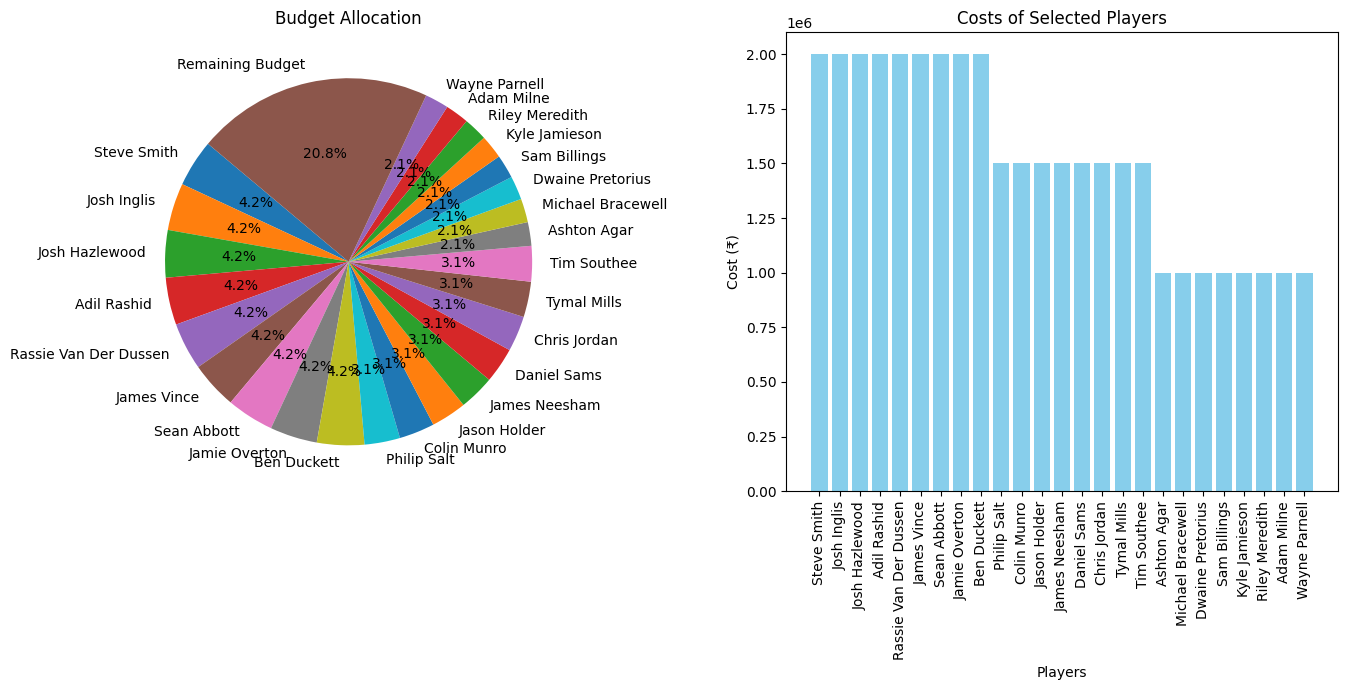

In [ ]:
import matplotlib.pyplot as plt

# Define selected players and their costs
selected_players = [
    {"name": "Steve Smith", "base_price": 2000000},
    {"name": "Josh Inglis", "base_price": 2000000},
    {"name": "Josh Hazlewood", "base_price": 2000000},
    {"name": "Adil Rashid", "base_price": 2000000},
    {"name": "Rassie Van Der Dussen", "base_price": 2000000},
    {"name": "James Vince", "base_price": 2000000},
    {"name": "Sean Abbott", "base_price": 2000000},
    {"name": "Jamie Overton", "base_price": 2000000},
    {"name": "Ben Duckett", "base_price": 2000000},
    {"name": "Philip Salt", "base_price": 1500000},
    {"name": "Colin Munro", "base_price": 1500000},
    {"name": "Jason Holder", "base_price": 1500000},
    {"name": "James Neesham", "base_price": 1500000},
    {"name": "Daniel Sams", "base_price": 1500000},
    {"name": "Chris Jordan", "base_price": 1500000},
    {"name": "Tymal Mills", "base_price": 1500000},
    {"name": "Tim Southee", "base_price": 1500000},
    {"name": "Ashton Agar", "base_price": 1000000},
    {"name": "Michael Bracewell", "base_price": 1000000},
    {"name": "Dwaine Pretorius", "base_price": 1000000},
    {"name": "Sam Billings", "base_price": 1000000},
    {"name": "Kyle Jamieson", "base_price": 1000000},
    {"name": "Riley Meredith", "base_price": 1000000},
    {"name": "Adam Milne", "base_price": 1000000},
    {"name": "Wayne Parnell", "base_price": 1000000}
]

# Total budget and remaining budget
total_budget = 100000000  # 100 crore = 100000000
remaining_budget = 10000000  # 10 crore = 10000000

# Extract player names and costs
player_names = [player["name"] for player in selected_players]
player_costs = [player["base_price"] for player in selected_players]

# Function to plot pie chart and bar graph
def plot_budget_utilization(player_names, player_costs, total_budget, remaining_budget):
    plt.figure(figsize=(14, 7))

    # Add a slice for the remaining budget
    player_names_with_remaining = player_names + ['Remaining Budget']
    player_costs_with_remaining = player_costs + [remaining_budget]

    plt.subplot(1, 2, 1)
    plt.pie(player_costs_with_remaining, labels=player_names_with_remaining, autopct='%1.1f%%', startangle=140)
    plt.title('Budget Allocation')

    plt.subplot(1, 2, 2)
    plt.bar(player_names, player_costs, color='skyblue')
    plt.xticks(rotation=90)
    plt.xlabel('Players')
    plt.ylabel('Cost (₹)')
    plt.title('Costs of Selected Players')

    plt.tight_layout()
    plt.show()

# Calculate total cost of selected players
total_cost = sum(player["base_price"] for player in selected_players)

# Run the function to generate plots
plot_budget_utilization(player_names, player_costs, total_budget, remaining_budget)


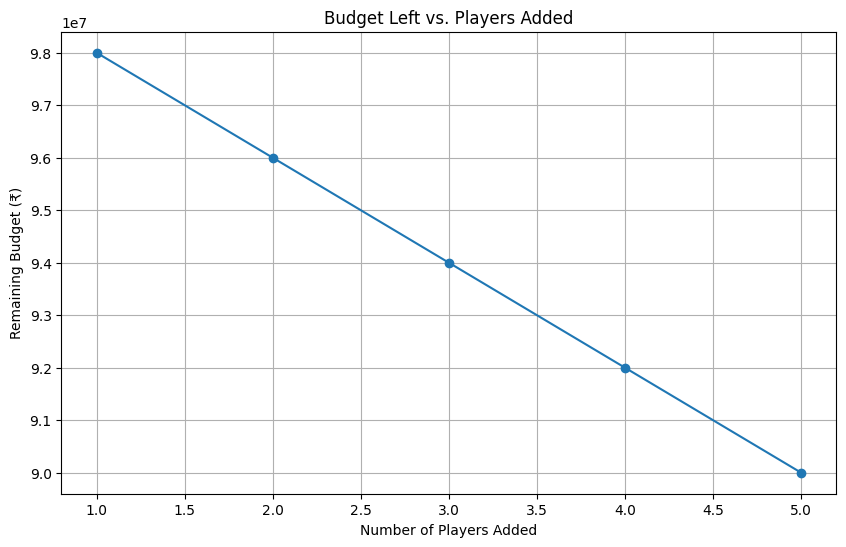

In [ ]:
import matplotlib.pyplot as plt

# Sample player data with their costs
players_data = [
    {"name": "Steve Smith", "cost": 2000000, "performance": 500},
    {"name": "Josh Inglis", "cost": 2000000, "performance": 450},
    {"name": "Josh Hazlewood", "cost": 2000000, "performance": 400},
    {"name": "Adil Rashid", "cost": 2000000, "performance": 420},
    {"name": "Rassie Van Der Dussen", "cost": 2000000, "performance": 460},
    # Add more players as needed
]

# Define total budget and initialize variables
total_budget = 100000000  # 100 crores
budget_left = total_budget
costs = []
remaining_budgets = []

# Calculate budget utilization
for player in players_data:
    costs.append(player["cost"])
    budget_left -= player["cost"]
    remaining_budgets.append(budget_left)

# Plotting Budget Left vs. Players Added
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(remaining_budgets) + 1), remaining_budgets, marker='o')
plt.xlabel('Number of Players Added')
plt.ylabel('Remaining Budget (₹)')
plt.title('Budget Left vs. Players Added')
plt.grid(True)
plt.show()


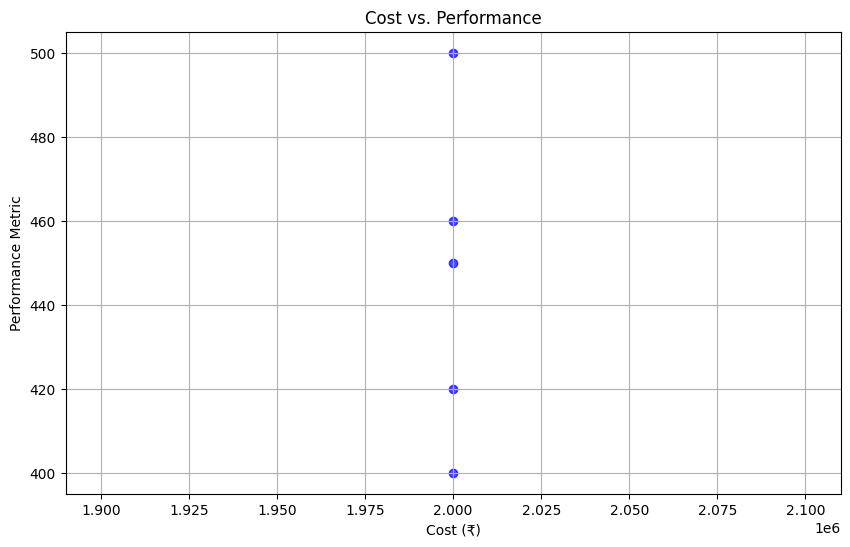

In [ ]:
import matplotlib.pyplot as plt

# Sample player data with their costs and performance metrics
players_data = [
    {"name": "Steve Smith", "cost": 2000000, "performance": 500},
    {"name": "Josh Inglis", "cost": 2000000, "performance": 450},
    {"name": "Josh Hazlewood", "cost": 2000000, "performance": 400},
    {"name": "Adil Rashid", "cost": 2000000, "performance": 420},
    {"name": "Rassie Van Der Dussen", "cost": 2000000, "performance": 460},
    # Add more players as needed
]

# Define total budget and initialize variables
total_budget = 100000000  # 100 crores
budget_left = total_budget
costs = []
remaining_budgets = []

# Calculate budget utilization
for player in players_data:
    costs.append(player["cost"])
    budget_left -= player["cost"]
    remaining_budgets.append(budget_left)

player_names = [player["name"] for player in players_data]
player_costs = [player["cost"] for player in players_data]
player_performance = [player["performance"] for player in players_data]

# Plotting Cost vs. Performance
plt.figure(figsize=(10, 6))
plt.scatter(player_costs, player_performance, color='blue', alpha=0.7)
plt.xlabel('Cost (₹)')
plt.ylabel('Performance Metric')
plt.title('Cost vs. Performance')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Data of players
players_data = [
    {"name": "Daryl Mitchell", "nationality": "Overseas", "role": "All-Rounder", "cost": 14000000},
    {"name": "Sameer Rizvi", "nationality": "Indian", "role": "Batter", "cost": 8400000},
    {"name": "Shardul Thakur", "nationality": "Indian", "role": "All-Rounder", "cost": 4000000},
    {"name": "Mustafizur Rahman", "nationality": "Overseas", "role": "Bowler", "cost": 2000000},
    {"name": "Rachin Ravindra", "nationality": "Overseas", "role": "All-Rounder", "cost": 1800000},
    {"name": "Avanish Rao Aravelly", "nationality": "Indian", "role": "Wicket-Keeper", "cost": 200000},
    # Add more players as needed
]

# Convert to DataFrame
df = pd.DataFrame(players_data)


In [ ]:
!pip install dash dash-core-components dash-html-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 45.3 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok



In [ ]:
!ngrok authtoken <your_auth_token>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `ngrok authtoken <your_auth_token>'
